[[348.0026363000684, 4439.034624963039, 7567.3913345314895, 11622.439937334919], [222.05415007205326, 2587.3351857054863, 4312.516421222086, 6463.30600005541], [103.11636685856892, 1390.8488201861999, 2400.781412647536, 4038.5212769463687], [56.84590300590635, 385.6002345921707, 386.14713924639256, 315.8881191808972], [103.74457395744068, 1389.517524652333, 2453.1091346811086, 4094.0309884938833], [57.90781816136552, 425.1603908930084, 402.1244376847519, 688.4282936067523]]


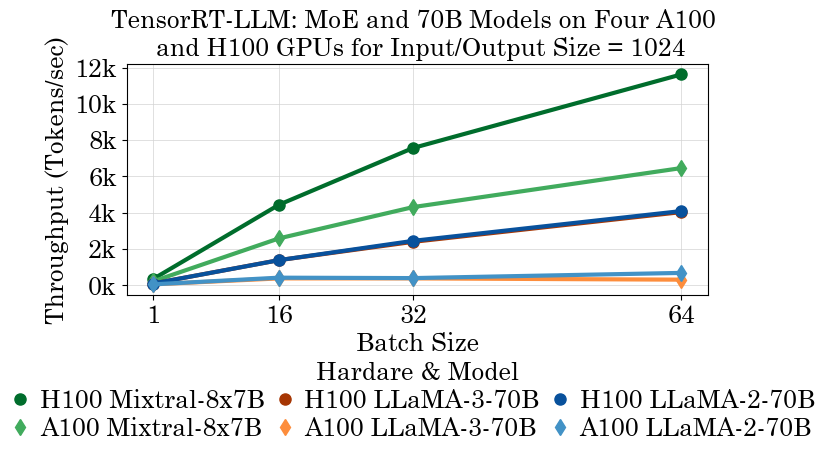

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import csv

alias_legend = {
    "meta-llama/Llama-2-7b-hf": "LLaMA-2-7B",
    "meta-llama/Llama-2-70b-hf": "LLaMA-2-70B",
    "meta-llama/Meta-Llama-3-8B": "LLaMA-3-8B",
    "meta-llama/Meta-Llama-3-70B": "LLaMA-3-70B",
    "mistralai/Mistral-7B-v0.1": "Mistral-7B",
    "mistralai/Mistral-7B-v0.3": "Mistral-7B",
    "mistralai/Mixtral-8x7B-v0.1": "Mixtral-8x7B",
    "Qwen/Qwen2-7B": "Qwen2-7B",
    "Qwen/Qwen2-72B": "Qwen2-72B",
    "BAAI/Aquila-7B": "Aquila-7B",
    "Qwen/Qwen1.5-7B": "Qwen1.5-7B",
    "facebook/opt-13b": "OPT-13B",
    "facebook/opt-6.7b": "OPT-6.7B",
    "huggyllama/llama-13b": "LLaMA-13B",
    "huggyllama/llama-7b": "LLaMA-7B",
    "EleutherAI/gpt-j-6b": "GPT-J-6B",
    "meta-llama/Llama-2-13b-hf": "LLaMA-2-13B",
    "google/gemma-1.1-7b-it": "Gemma-1.1-7B",
    "bigscience/bloom-7b1": "Bloom-7.1B",
    "Deci/DeciLM-7B": "DeciLM-7B",
    "google/gemma-7b": "Gemma-7B",
    "Tensor Parallelism": "TP",
    "Pipeline Parallelism": "PP",
    "Expert Parallelism": "EP",
    "Tensor (2) and Expert (2) Parallelism": "TP & PP",
    "Deepspeed": "DS",
    "TensorRT-LLM": "TRT-LLM",
    "Without": "w/o",
    "With": "w",
    "Nvidia A100 GPU": "A100",
    "Nvidia H100 GPU": "H100",
    "Nvidia GH200 GPU": "GH200",
    "Intel PVC GPU": "PVC",
    "AMD MI250 GPU": "MI250",
    "Habana Gaudi2": "Gaudi2",
    "SambaNova SN40L": "SN40L",
    "Weight = fp16, KV Cache = fp16": "{fp16, fp16}",
    "Weight = fp16, KV Cache = fp8": "{fp16, fp8}",
    "Speculative Decoding": "SD",
    "Weight = full_prec, KV Cache = int8": "{fp16, int8}",
    "Weight = full_prec, KV Cache = fp8": "{fp16, fp8}",
    "Weight = int8_sq, KV Cache = int8": "{int8, int8}",
    "Weight = int8_sq, KV Cache = fp8": "{int8, fp8}"
}



def read_csv_without_header(csv_file):
    with open(csv_file, "r", newline="") as f:
        reader = csv.reader(f)
        next(reader)

        rows = []
        for row in reader:
            rows.append(row)
    return rows


def get_matching_row(hardware, numhardware, framework, network, inp_out, batch):
    csv_file = "../All_results.csv"
    rows = read_csv_without_header(csv_file)
    
    for row in rows:
        if row != []:
            Hardware = str(row[0]) 
            Num_of_Hardware = int(row[1])
            Framework = str(row[2])
            Model = str(row[3])
            Input_Output_Length = int(row[4]) 
            Batch_Size = int(row[5])
            Latency = float(row[6])
            Throughput = float(row[7])
            
            if Hardware == hardware:
                if Num_of_Hardware == numhardware:
                    if Framework == framework:
                        if Model == network:
                            if Input_Output_Length == inp_out:
                                if Batch_Size == batch:
                                    return Throughput
    return None
    

def get_data_rows():
    
    results_data = []
    legends = []
    for inp_out in [1024]:
        for network in ["mistralai/Mixtral-8x7B-v0.1","meta-llama/Meta-Llama-3-70B","meta-llama/Llama-2-70b-hf"]:
            for hardware in ["Nvidia H100 GPU", "Nvidia A100 GPU"]:
                batch_row = []
                for batch in [1, 16, 32, 64]:
                    for numhardware in [4]:
                        for framework in ["TensorRT-LLM"]:
                            throughput = get_matching_row(hardware, numhardware, framework, network, inp_out, batch)
                            batch_row.append(throughput)
                legends.append(alias_legend[hardware] + " " + alias_legend[network])            
                results_data.append(batch_row)
                            
    x_axis_labels = [1, 16, 32, 64]

    colors = ['#006d2c', '#41ab5d', '#a63603', '#fd8d3c', '#08519c', '#4292c6']
#     symbols = ['o', 'p', 'd', 's', 'v']
    symbols = ['o', 'd']*3
    
    return results_data, x_axis_labels, legends, colors, symbols



def plot_multiple_lines(lines_data, x_axis_labels, legends, colors, symbols, title, xlabel, 
                        ylabel, linewidth, markersize, fontsize, n_cols_legend,
                        fig_plot_length, fig_plot_height, legend_title, save_pdf, labelspacing, columnspacing):
    
    print(lines_data)
    
    plt.figure(figsize=(fig_plot_length, fig_plot_height))
    plt.rcParams['font.family'] = 'Century Schoolbook'
    
    for i, line_data in enumerate(lines_data):
        
        valid_y_axis = [x for x in line_data if x is not None]
        valid_x_axis = x_axis_labels[0:len(valid_y_axis)]
        
        plt.plot(valid_x_axis, valid_y_axis, color=colors[i], marker=symbols[i], 
                 label=str(legends[i]), linewidth = linewidth, markersize = markersize)
    
#     for x_value in x_axis_labels:
#         plt.axvline(x=x_value, color='gray', linestyle='-', alpha=0.5)
    
    plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

    
    plt.title(title, fontsize = fontsize)
    
    plt.xlabel(xlabel, fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    
    plt.xticks(x_axis_labels, fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    
    def thousands_formatter(x, pos):
        return f'{int(x/1000)}k'
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
    plt.legend(title=legend_title, loc='lower center', bbox_to_anchor=(0.5, -0.73), 
               ncol=n_cols_legend, fontsize = fontsize, title_fontsize = fontsize, frameon = False, 
               handlelength = 0, labelspacing = labelspacing, columnspacing = columnspacing)
    
    plt.savefig(save_pdf, dpi=300, bbox_inches='tight', pad_inches=0.03)
    plt.show()
    

lines_data, x_axis_labels, legends, colors, symbols = get_data_rows()

plot_title = "TensorRT-LLM: MoE and 70B Models on Four A100 \n and H100 GPUs for Input/Output Size = 1024"
x_axis_title = "Batch Size"
y_axis_title = "Throughput (Tokens/sec)"

linewidth = 3
markersize = 8
fontsize = 18

n_cols_legend = len(legends) // 2 

fig_plot_length = 7.5
fig_plot_height = 3

labelspacing = 0.2
columnspacing = 0.8


legend_title = "Hardare & Model"

save_pdf = "70B_Plots_TRT_LLM.pdf"

plot_multiple_lines(lines_data, x_axis_labels, legends, colors, symbols, 
                    plot_title, x_axis_title, y_axis_title, 
                    linewidth, markersize, fontsize, n_cols_legend, 
                    fig_plot_length, fig_plot_height, legend_title, save_pdf, labelspacing, columnspacing)

In [14]:
4038.5212769463687/515.888

7.828290785880595

In [13]:
a = [103.11636685856892, 1390.8488201861999, 2400.781412647536, 4038.5212769463687] #H100
b = [56.84590300590635, 385.6002345921707, 386.14713924639256, 315.8881191808972] #A100



In [15]:
4038.5212769463687/103.11

39.167115478094935